# Intro to K-Means Clustering

#### Experimenting with k-means clustering to detect anomalies

Links:
- [K-Means Clustering with Python: Beginner Tutorial](https://medium.com/analytics-vidhya/k-means-clustering-with-python-beginner-tutorial-45a44c34e7f)
- [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/)

Import modules, load in CSV:

In [1]:
# avoid memory leak
%env OMP_NUM_THREADS=1

from dotenv import load_dotenv
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

load_dotenv()
DATASET_PATH = os.environ.get("DATASET_PATH")

iris = pd.read_csv(DATASET_PATH + "iris.csv")
iris["Species"] = iris.Species.str.replace("Iris-", "")
iris.head()

env: OMP_NUM_THREADS=1


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Elbow method for determining the optimal number of clusters:

Run several k-means (k = 1, ..., 10) and record the SSE for each one. When SSE is plot against the number of clusters ($k$), there is a sweet spot where the SSE curve starts to bend, known as the "elbow point". The $k$ value at this point is thought to be a reasonable trade-off between error and number of clusters. In this case, the optimal $k$ looks to be around 3.

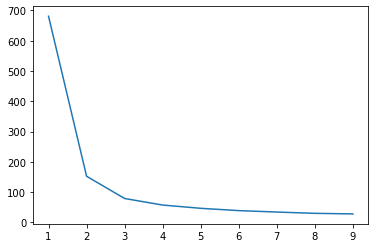

In [2]:
df = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

sse = []
K = range(1, 10)
for k in K:  # loop through and calculate SSE
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    sse.append(kmeanModel.inertia_)
    
# plot SSE against K
plt.plot(K, sse)
plt.show()

Then create a model with the optimal number of clusters from above, and fit it to the data. Then add the predictions as a new column to the existing dataframe:

In [3]:
kmeans_model = KMeans(n_clusters=3)
kmeans_predict = kmeans_model.fit_predict(df)
iris["Cluster"] = kmeans_predict
display(iris)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


Plot each cluster from the data onto the graph:

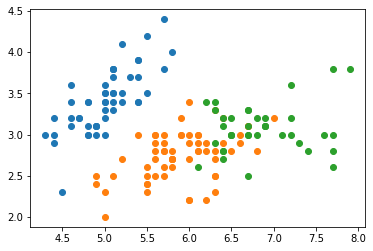

In [4]:
for i in range(3):
    plt.scatter(np.array(df)[kmeans_predict == i, 0], np.array(df)[kmeans_predict == i, 1])